# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [7]:
import pandas as pd
import traceback
import os.path
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
from scipy.stats import randint as sp_randint
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 29)
data_files = {'train_data': pd.Series(['gold_recovery_train_new.csv'], index = ['file_name']), 
              'test_data':pd.Series(['gold_recovery_test_new.csv'], index = ['file_name']), 
              'full_data': pd.Series(['gold_recovery_full_new.csv'], index = ['file_name'])
             }
local_path = os.path.join('C:', os.sep, 'Users', 'timpu', 'Desktop', 'Data Science(Проекты и шпаргалки)',
                          'Проекты', '10 Страхование', 'data')
web_dir_path = os.path.join(os.sep, 'datasets' + os.sep)
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [9]:
for key_name, srce_data in data_files.items():
    try:
        srce_data['data']  = pd.read_csv(web_dir_path + srce_data['file_name'])
    except FileNotFoundError:
        srce_data['data']  = pd.read_csv(local_path + srce_data['file_name'])
    else:
        print('Общая информация о датасете ', srce_data['file_name'], ':', sep='')
        srce_data['data'].info()
        print('\nОбзор данных датасета:', sep='')
        display(srce_data['data'])
        print('Минимальные значения в датасете ', srce_data['file_name'], ':', sep='')
        print(srce_data['data'].min(), '\n')
        print('Максимальные значения в датасете ', srce_data['file_name'], ':', sep='')
        print(srce_data['data'].max(), '\n')
        print('Количество дубликатов в датасете ', srce_data['file_name'], ':', sep='')
        print(srce_data['data'].duplicated().sum(), '\n')
        print('Колонки с пропущенными значениями в датасете ', srce_data['file_name'], ':\n', sep='')
        print(srce_data['data'].isna().sum(), '\n')
        srce_data['data']['date'] = pd.to_datetime(srce_data['data']['date'])

        srce_data['data'] = srce_data['data'].set_index('date')

        srce_data['data'] = srce_data['data'].fillna(method='ffill')

Общая информация о датасете gold_recovery_train_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_s

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,...,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,...,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,...,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,...,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,11.322140,7.25,0.996739,...,23.966838,-500.008812,23.954443,-499.944710,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,11.913613,7.25,1.009869,...,23.985703,-500.083811,23.958945,-499.990309,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.50,1.304232,...,26.002402,-499.953431,22.987238,-499.967351,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.50,1.302419,...,26.031747,-500.384612,22.991058,-500.079590,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,6.50,1.315926,...,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,98.880538,7.984164,6.50,1.241969,...,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Минимальные значения в датасете gold_recovery_train_new.csv:
date                                                  2016-01-15 00:00:00
final.output.concentrate_ag                                           0.0
final.output.concentrate_pb                                           0.0
final.output.concentrate_sol                                          0.0
final.output.concentrate_au                                           0.0
final.output.recovery                                                 0.0
final.output.tail_ag                                                  0.0
final.output.tail_pb                                                  0.0
final.output.tail_sol                                                 0.0
final.output.tail_au                                                  0.0
primary_cleaner.input.sulfate                                    0.003112
primary_cleaner.input.depressant                                      0.0
primary_cleaner.input.feed_size                    

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,...,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,...,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,...,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,...,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,...,20.031100,-449.372570,14.013968,-449.526900,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,1399.480508,-499.374053,11.327427,...,19.962364,-450.638828,14.009245,-450.022259,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,1400.334792,-499.243459,11.638973,...,24.939573,-500.098479,12.968448,-499.952023,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,1447.653388,-480.403849,11.338091,...,26.369171,-499.222375,17.704862,-499.545681,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,1502.585343,-498.260225,11.285908,...,28.000224,-500.565876,22.996528,-500.477583,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,1502.688918,-501.569723,11.289710,...,27.980387,-499.907225,23.046562,-499.744914,19.958760,

Минимальные значения в датасете gold_recovery_test_new.csv:
date                                          2016-09-01 00:59:59
primary_cleaner.input.sulfate                            2.566156
primary_cleaner.input.depressant                         0.003839
primary_cleaner.input.feed_size                              5.65
primary_cleaner.input.xanthate                           0.004984
primary_cleaner.state.floatbank8_a_air                        0.0
primary_cleaner.state.floatbank8_a_level              -795.316337
primary_cleaner.state.floatbank8_b_air                        0.0
primary_cleaner.state.floatbank8_b_level              -799.997015
primary_cleaner.state.floatbank8_c_air                        0.0
primary_cleaner.state.floatbank8_c_level              -799.960571
primary_cleaner.state.floatbank8_d_air                        0.0
primary_cleaner.state.floatbank8_d_level               -799.79425
rougher.input.feed_ag                                    0.568441
rougher.input.fe

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,...,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,...,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,...,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,...,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,11.322140,7.25,0.996739,...,23.966838,-500.008812,23.954443,-499.944710,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,11.913613,7.25,1.009869,...,23.985703,-500.083811,23.958945,-499.990309,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.50,1.304232,...,26.002402,-499.953431,22.987238,-499.967351,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.50,1.302419,...,26.031747,-500.384612,22.991058,-500.079590,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,6.50,1.315926,...,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,98.880538,7.984164,6.50,1.241969,...,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Минимальные значения в датасете gold_recovery_full_new.csv:
date                                                  2016-01-15 00:00:00
final.output.concentrate_ag                                           0.0
final.output.concentrate_pb                                           0.0
final.output.concentrate_sol                                          0.0
final.output.concentrate_au                                           0.0
final.output.recovery                                                 0.0
final.output.tail_ag                                                  0.0
final.output.tail_pb                                                  0.0
final.output.tail_sol                                                 0.0
final.output.tail_au                                                  0.0
primary_cleaner.input.sulfate                                    0.003112
primary_cleaner.input.depressant                                      0.0
primary_cleaner.input.feed_size                     

**Вывод**   
Нами изучены данные и в соотвествии с условиями задачи столбец date привидён к типу "дата", а также установен в качестве индексного в датафреймах. Пропуски заполнены ближайшими значениями. 

Формула расчёта эффективности обогащения выглядит следующим образом:

$$ recovery = \frac{C \times (F-T)}{F \times (C-T)} \times 100\%$$   
   
C — доля золота в концентрате после флотации/очистки;   
F — доля золота в сырье/концентрате до флотации/очистки;   
T — доля золота в отвальных хвостах после флотации/очистки.

## Анализ данных

In [5]:
def rec_test(c, f, t):
    return ((c*(f - t))/(0.000001 + f*(c - t)))*100

In [6]:
#for stg in ['rougher', 'final']:
recovery_rougher = rec_test(data_files['train_data']['data']['rougher.output.concentrate_au'],
        data_files['train_data']['data']['rougher.input.feed_au'],
        data_files['train_data']['data']['rougher.output.tail_au'])
print(f'Средняя абсолютная ошибка эффективности обогащения, расчитанной по формуле  и привидённой в обучающей выборке для стадии rougher, равна:', 
      mean_absolute_error(recovery_rougher, data_files['train_data']['data']['rougher.output.recovery']))

recovery_final = rec_test(data_files['train_data']['data']['final.output.concentrate_au'],
        data_files['train_data']['data']['primary_cleaner.output.concentrate_au'],
        data_files['train_data']['data']['final.output.tail_au'])
print(f'Средняя абсолютная ошибка эффективности обогащения, расчитанной по формуле и привидённой в обучающей выборке для стадии final, равна:', 
      mean_absolute_error(recovery_final, data_files['train_data']['data']['final.output.recovery']))

Средняя абсолютная ошибка эффективности обогащения, расчитанной по формуле  и привидённой в обучающей выборке для стадии rougher, равна: 3.285870273910435e-06
Средняя абсолютная ошибка эффективности обогащения, расчитанной по формуле и привидённой в обучающей выборке для стадии final, равна: 55182072.810677774


**Вывод**   
Наличие такого минимального отклонения в данных стадии rougher говорит о фактическом совпадении расчётов и имеющихся в таблице данных. Однако расчёты для стадии final показывают, что эффективность, привиденная в данных не совпадает с расчётной, что говорит о возможной ошибке в данных.

In [7]:
miss_col = []
for col in data_files['full_data']['data']:
    try:
        data_files['test_data']['data'][col]
    except KeyError:
        miss_col.append(col)
print(data_files['full_data']['data'][miss_col].info())
display(data_files['full_data']['data'].loc[~data_files['full_data']['data'].index.isin(data_files['test_data']['data'].index)][miss_col])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,...,rougher.calculation.au_pb_ratio,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,10.389648,19.529297,34.174427,14.936526,...,2.838687,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,10.497069,19.369147,34.118526,16.250511,...,2.858998,11.615865,7.278807,28.067063,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,10.354494,19.167579,33.969464,16.491823,...,2.945989,11.695753,7.216833,27.454037,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,8.496563,15.978538,28.260743,16.024359,...,3.002340,11.915047,7.175616,27.341277,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,9.986786,19.199864,33.044932,16.480185,...,3.169615,12.411054,7.240205,27.041023,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,6.559174,12.445966,7.056338,32.940215,22.854592,...,1.155559,11.124896,10.984003,30.068876,18.603550,89.574376,4.207261,0.612935,16.666590,0.748633,0.000000,0.000000,0.000000,0.000000
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,6.612376,12.623947,7.542264,32.925325,23.002490,...,1.167342,11.425983,10.888213,29.783972,18.441436,87.724007,4.177943,0.650557,16.960649,0.771582,0.000000,0.000000,0.000000,0.000000
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,7.128896,12.633558,7.941900,31.856742,22.298149,...,1.125637,8.523497,8.955135,22.786467,15.111231,88.890579,4.050010,0.636095,18.323080,0.685059,0.000000,0.000000,0.000000,0.000000


In [8]:
target_test_lst = ['rougher.output.recovery', 'final.output.recovery']
data_files['test_data']['targets'] = data_files['full_data']['data'].loc[data_files['full_data']['data'].index.isin(data_files['test_data']['data'].index)][target_test_lst]
print(data_files['test_data']['targets'])

                     rougher.output.recovery  final.output.recovery
date                                                               
2016-09-01 00:59:59                89.993421              70.273583
2016-09-01 01:59:59                88.089657              68.910432
2016-09-01 02:59:59                88.412756              68.143213
2016-09-01 03:59:59                87.360133              67.776393
2016-09-01 04:59:59                83.236367              61.467078
...                                      ...                    ...
2017-12-31 19:59:59                95.172585              68.919891
2017-12-31 20:59:59                94.575036              68.440582
2017-12-31 21:59:59                93.018138              67.092759
2017-12-31 22:59:59                92.599042              68.061186
2017-12-31 23:59:59                91.177695              71.699976

[5290 rows x 2 columns]


**Вывод**   
Мы получили список пропущенных 34 колонок тестовой выборки и сформировали выборку из полного датасета данных, которые по временному индексу не вошли в тестовую выборку. Из условий задачи известно, что тестовая выборка не содержит целевого признака и показателей, которые вычисляются на поздних технологических этапах. Из чего можно предположить, что данные исключены по причине их связи с целевыми признаками, то есть чтобы избежать утечки данных и завышенных результатов предсказаний модели. Тип данных исключенных столбцов вещественный (float).

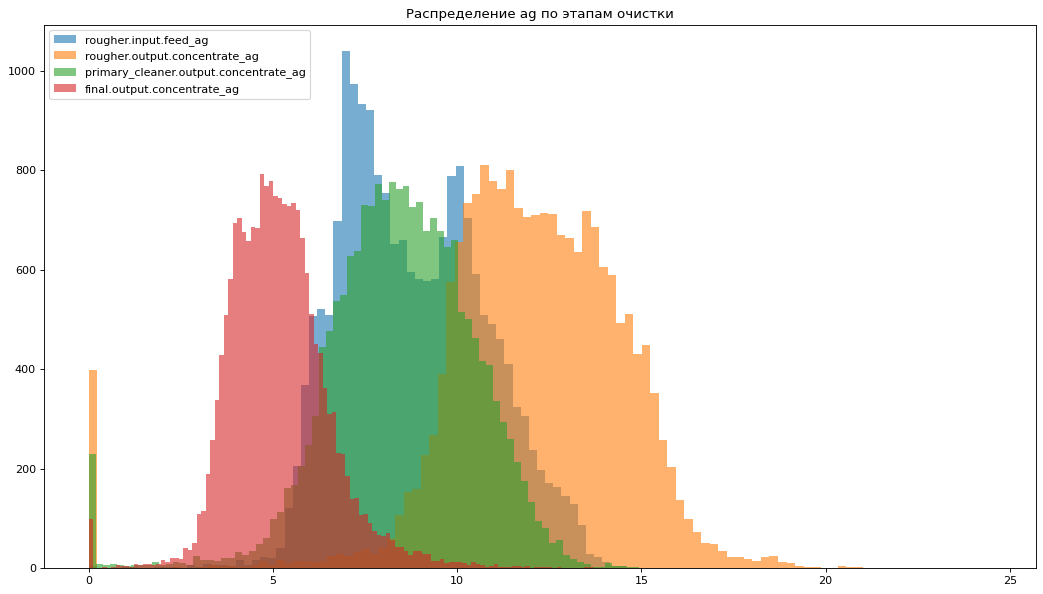

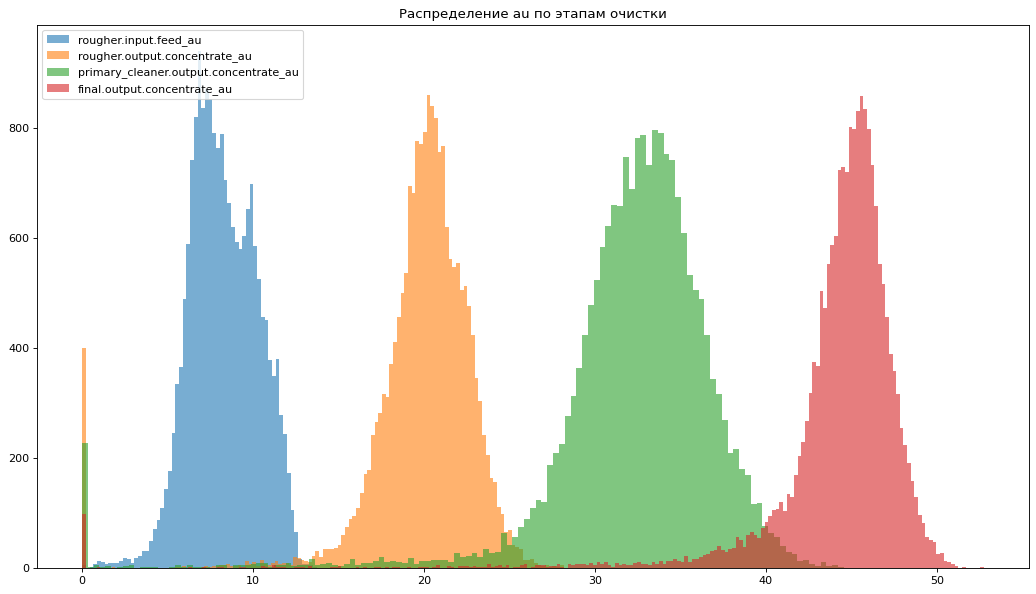

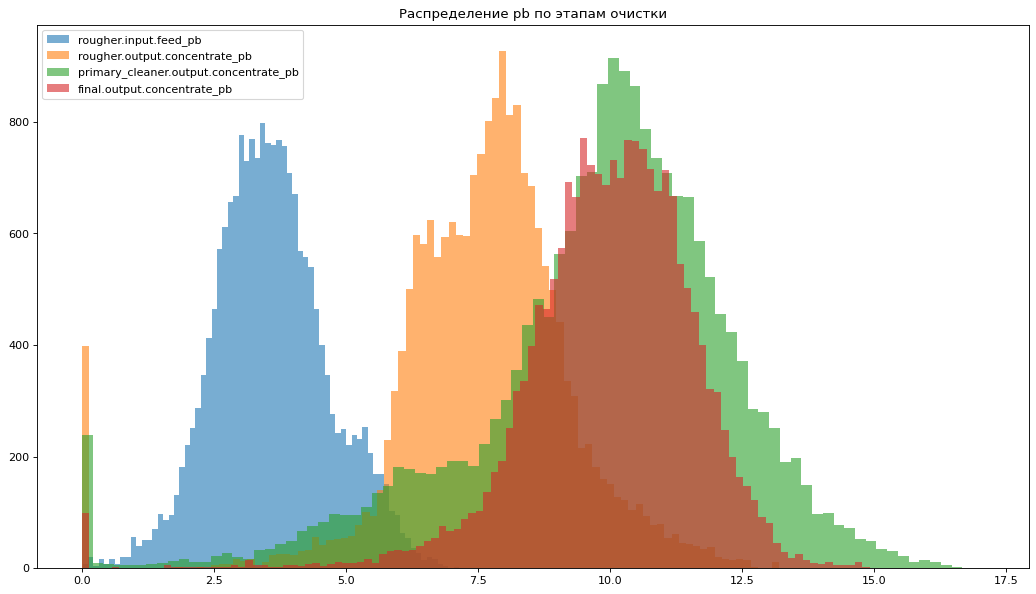

In [9]:

for el in ['ag', 'au', 'pb']:
    plt.figure(figsize=(16, 9), dpi=80)
    for stg in ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        data = data_files['full_data']['data'][stg + el]
        q25, q75 = np.percentile(data, [25, 75])
        bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
        bins = round((data.max() - data.min()) / bin_width)
        plt.hist(data, bins=bins, alpha = 0.6, label=stg+el)
        plt.legend(loc='upper left')
        plt.title(f'Распределение {el} по этапам очистки')
    plt.show()

**Вывод**   
Постороены графики с расчётом количества корзин по методу Фридмана-Диакониса (Freedman-Diaconis). Графики показывают, что по мере очистки с каждым этапом содержание золота растёт, а содержание иных металлов падает, так как технологические процессы подразумевают повышение содержания золота, соотвественно понижение содердания примесей и иных сопуствующих металлов.

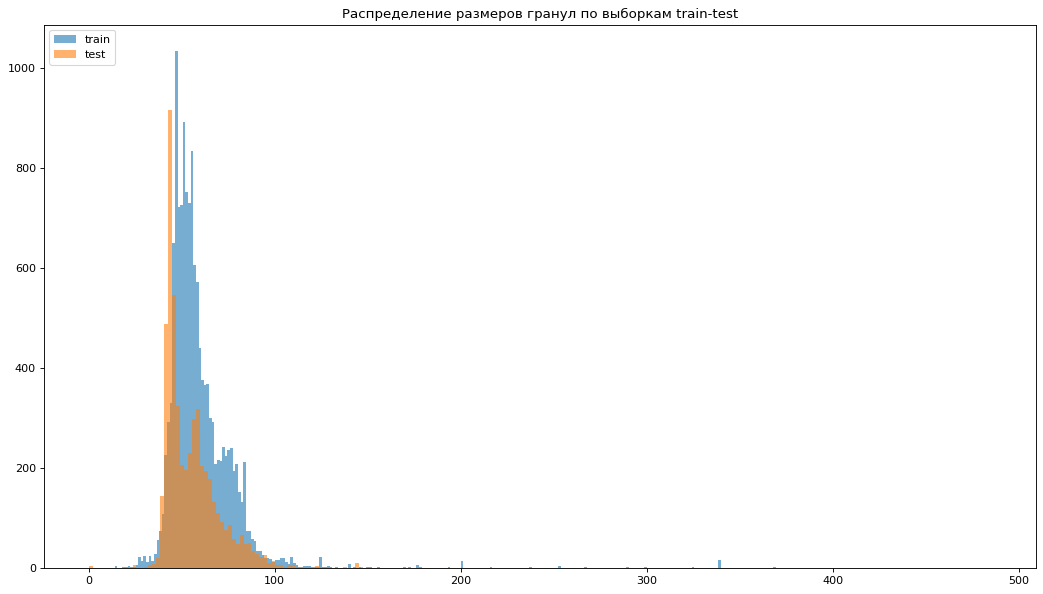

In [10]:
plt.figure(figsize=(16, 9), dpi=80)
train_data = data_files['train_data']['data']['rougher.input.feed_size']
q25, q75 = np.percentile(train_data, [25, 75])
bin_width = 2 * (q75 - q25) * len(train_data) ** (-1/3)
bins = round((train_data.max() - train_data.min()) / bin_width)
plt.hist(train_data, bins=bins, alpha = 0.6, label="train")

test_data = data_files['test_data']['data']['rougher.input.feed_size']
q25, q75 = np.percentile(test_data, [25, 75])
bin_width = 2 * (q75 - q25) * len(test_data) ** (-1/3)
bins = round((test_data.max() - test_data.min()) / bin_width)
plt.hist(test_data, bins=bins, alpha = 0.6, label="test")

plt.legend(loc='upper left')
plt.title('Распределение размеров гранул по выборкам train-test')
plt.show()

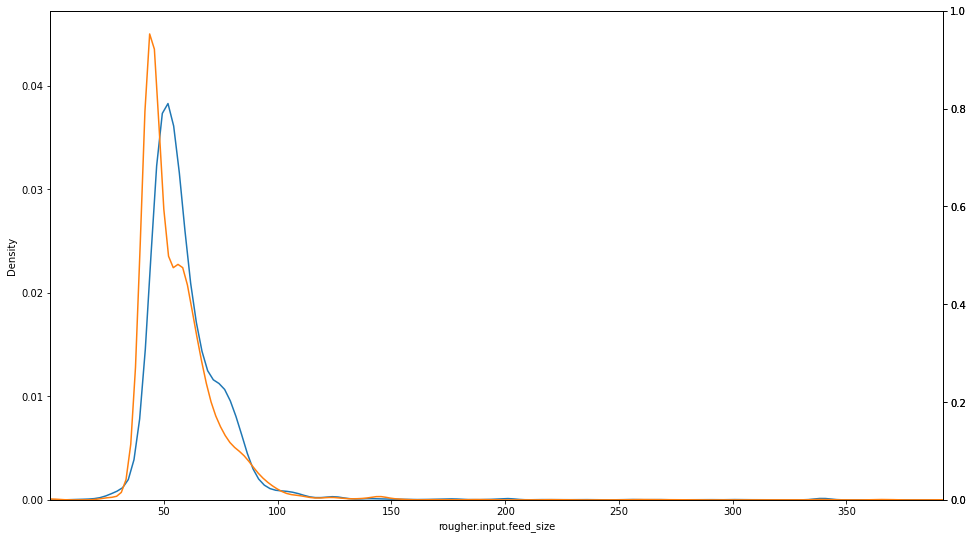

In [11]:
train_data = data_files['train_data']['data']['rougher.input.feed_size']
test_data = data_files['test_data']['data']['rougher.input.feed_size']

import seaborn as sns


fig, ax1 = plt.subplots(figsize=(16, 9))
sns.kdeplot(x=train_data, ax=ax1)
ax1.set_xlim((train_data.min(), train_data.max()))
ax2 = ax1.twinx()
sns.kdeplot(x=test_data, ax=ax1)
ax1.set_xlim((test_data.min(), test_data.max()))
ax2 = ax1.twinx()

In [12]:
print('Размеры гранул в train-выборке, квартили, страндартное отклонение распределения:')
print(train_data.describe())
print('____________________________________________________________________________')
print('Размеры гранул в test-выборке, квартили, страндартное отклонение распределения:')
print(test_data.describe())

Размеры гранул в train-выборке, квартили, страндартное отклонение распределения:
count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64
____________________________________________________________________________
Размеры гранул в test-выборке, квартили, страндартное отклонение распределения:
count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


**Вывод**   
В тестовой выборке значения параметра размера гранул rougher.input.feed_size заметно ниже по основным параметрам, описывающим распределение.

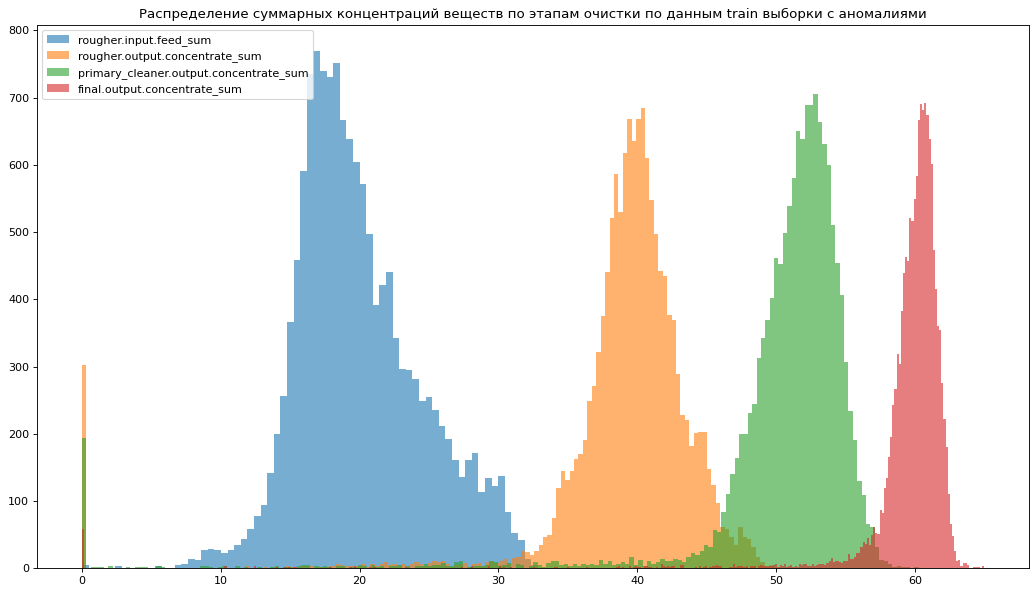

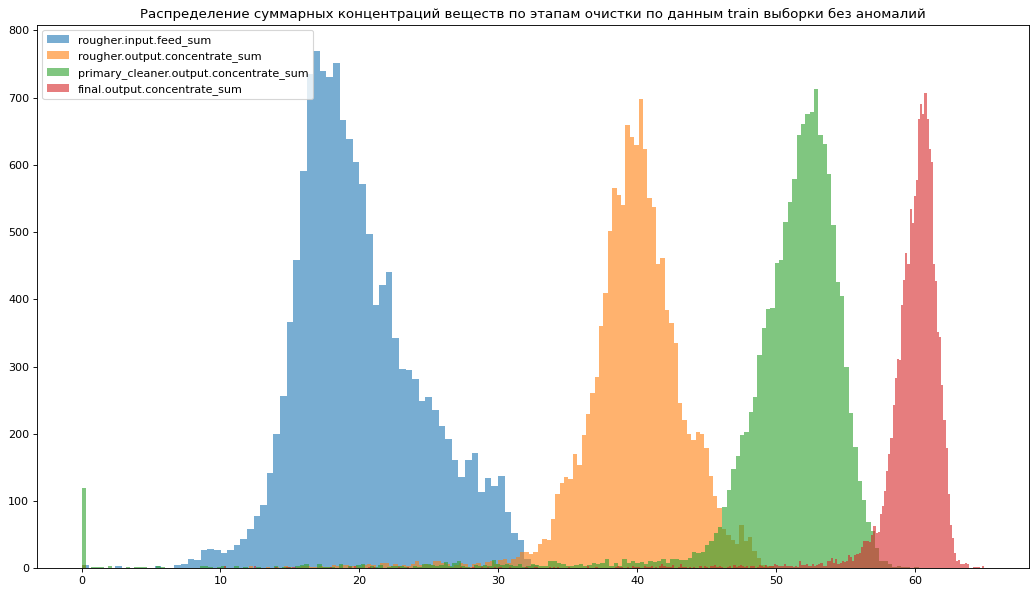

In [13]:
train_data = data_files['train_data']['data'].copy()
for el in ['ag', 'au', 'pb']:
    for stg in ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        try:
            train_data[stg + 'sum'] = train_data[stg + 'sum'] + train_data[stg + el]
        except:
            train_data[stg + 'sum'] = train_data[stg + el]
            
plt.figure(figsize=(16, 9), dpi=80)    
for stg in ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']:
        data = train_data[stg]
        q25, q75 = np.percentile(data, [25, 75])
        bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
        bins = round((data.max() - data.min()) / bin_width)
        plt.hist(data, bins=bins, alpha = 0.6, label=stg)
        plt.legend(loc='upper left')
        plt.title(f'Распределение суммарных концентраций веществ по этапам очистки по данным train выборки с аномалиями')
plt.show()

plt.figure(figsize=(16, 9), dpi=80)    
for stg in ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']:
        data = train_data[train_data[stg] != 0][stg]
        q25, q75 = np.percentile(data, [25, 75])
        bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
        bins = round((data.max() - data.min()) / bin_width)
        plt.hist(data, bins=bins, alpha = 0.6, label=stg)
        plt.legend(loc='upper left')
        plt.title(f'Распределение суммарных концентраций веществ по этапам очистки по данным train выборки без аномалий')
plt.show()


**Вывод**   
Устранили нулевые (совокупная концентрация 0) значения. По гистограмам наблюдается смещение в сторону увеличения суммарных концентраций веществ, что говорит о нромальном технологическом процессе, эффективность второго этапа которого в части очистки сопуствующих веществ (ag, pb) не очевидна.

## Модель

Формула расчёта метрик SMAPE выглядят следующим образом:

$ \ \begin{align*} sMAPE =  \frac{1}{N}  \sum_{i=1}^{N}  \frac{|y_i - \widehat{y}_i|}{(|y_i| + |\widehat{y}_i|)/2} \times 100\% \ \end{align*}$

$Итоговое \\ \begin{align*}
sMAPE = 25\% \times sMAPE(rougher) + 75 \% \ \times \  sMAPE(final) 
\end{align*}$

In [14]:
def smp(target, predictions):
    smape = 1 / len(target) * sum(abs(target - predictions) / (0.000001 + abs(target) + abs(predictions)) / 2) * 100
    return smape


In [15]:
def model_srch(features_train, target_train, smape_scorer, stg_name):
    
    param_dist_forest = {"max_depth": [3, None],
                  "max_features": sp_randint(1, 11),
                  "min_samples_split": sp_randint(2, 11),}

    random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist_forest,
                                       n_iter=20, scoring=smape_scorer, random_state = 54321)
    random_search.fit(features_train, target_train)
    best_model_forest = random_search.best_estimator_

    param_dist_tree = {"splitter":["best","random"],
                       "max_depth" : [1,3,5,7,9,11,12],
                       "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                       "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
                       "max_features":["auto","log2","sqrt",None],
                       "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

    random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_dist_tree,
                                        scoring=smape_scorer, cv=5, refit=True, random_state = 54321)
    random_search.fit(features_train, target_train)
    best_model_tree = random_search.best_estimator_

    model_forest = best_model_forest
    scores_forest = cross_val_score(model_forest, features_train, target_train, scoring=smape_scorer, cv=5)
    model_forest = model_forest.fit(features_train, target_train)
    smape_forest = abs(scores_forest.mean())

    model_forest_dummy = DummyRegressor(strategy = 'mean')   
    scores_forest_dummy = cross_val_score(model_forest_dummy, features_train, target_train, scoring=smape_scorer, cv=5)
    model_forest_dummy = model_forest_dummy.fit(features_train, target_train)
    smape_forest_dummy = abs(scores_forest_dummy.mean())

    print(f'Лучшее значение sMAPE для случайного леса ({stg_name}): {smape_forest}')
    print(f'Лучшее значение sMAPE для DUMMY случайного леса ({stg_name}): {smape_forest_dummy}')
    print(f'R2 модели случайного леса ({stg_name}): {model_forest.score(features_train, target_train)}')
    print(f'R2 DUMMY модели случайного леса ({stg_name}): {model_forest_dummy.score(features_train, target_train)}')
    print('________________________________________________________________________________________')
    
    model_tree = best_model_tree
    scores_tree = cross_val_score(model_tree, features_train, target_train, scoring=smape_scorer, cv=5)
    model_tree = model_tree.fit(features_train, target_train)
    smape_tree = abs(scores_tree.mean())

    model_tree_dummy = DummyRegressor(strategy = 'mean')    
    scores_tree_dummy = cross_val_score(model_tree_dummy, features_train, target_train, scoring=smape_scorer, cv=5)
    model_tree_dummy = model_tree_dummy.fit(features_train, target_train)
    smape_tree_dummy = abs(scores_tree_dummy.mean())


    print(f'Лучшее значение sMAPE для дерева решений ({stg_name}): {smape_tree}')
    print(f'Лучшее значение sMAPE для DUMMY дерева решений ({stg_name}): {smape_tree_dummy}')
    print(f'R2 модели дерева решений ({stg_name}): {model_tree.score(features_train, target_train)}')
    print(f'R2 DUMMY модели дерева решений ({stg_name}): {model_tree_dummy.score(features_train, target_train)}')
    print('________________________________________________________________________________________')
    
    model_linear = LinearRegression()
    scores_linear = cross_val_score(model_linear, features_train, target_train, scoring=smape_scorer, cv=5)
    model_linear = model_linear.fit(features_train, target_train)
    smape_linear = abs(scores_linear.mean())

    model_linear_dummy = DummyRegressor(strategy = 'mean')   
    scores_linear_dummy = cross_val_score(model_linear_dummy, features_train, target_train, scoring=smape_scorer, cv=5)
    model_linear_dummy = model_linear_dummy.fit(features_train, target_train)
    smape_linear_dummy = abs(scores_linear_dummy.mean())

    print(f'Лучшее значение sMAPE для линейной регрессии ({stg_name}):  {smape_linear}')
    print(f'Лучшее значение sMAPE для DUMMY линейной регрессии ({stg_name}): {smape_linear_dummy}')
    print(f'R2 модели линейной регрессии ({stg_name}): {model_linear.score(features_train, target_train)}')
    print(f'R2 DUMMY модели линейной регрессии ({stg_name}): {model_linear_dummy.score(features_train, target_train)}')
    print('********************************************************************************************************')
    
    
    return model_forest, model_tree, model_linear


**Пояснения к коду**   
Ниже мы убираем и сохраняем таргеты из трэйн-даты, убираем также отсуствующие в тест-дате колонки-фичи, масштабируем числовые данные, сбрасываем индексы-даты, чтобы убрать утечку данных, сохраняем в новых датасетах в словаре. Затем мы перебираем таргеты из списка, отбирая фичи для обучения по стадии очистки (rougher(включает фичи rougher), final(включает фичи и rougher, и final)), обучаем на них модели 3-х видов в функции model_srch, подбираем параметры с помощью RandomizedSearchCV и используем лучшие параметры в обучении моделей, определяя их с помощью кастомной метрики smape. Проверяем работоспособность моделей, сравнивая их метрики с DUMMY-моделями, убеждаемся, что они работают. Выводим на экран значения и определяем по ним лучшую.

In [16]:
target_train_lst = ['rougher.output.recovery', 'final.output.recovery']
data_files['train_data']['targets'] = data_files['train_data']['data'][target_train_lst]
df = data_files['train_data']['data'].drop(miss_col, axis=1)
scaler = StandardScaler()
scaler.fit(df)
df[df.columns] = scaler.transform(df)
data_files['train_data']['sclr_data'] = df.reset_index(drop=True)

df = data_files['test_data']['data']
df[df.columns] = scaler.transform(df)
data_files['test_data']['sclr_data'] = df.reset_index(drop=True)

data_files['scaler'] = scaler

for trgt in data_files['train_data']['targets']:
    
    smape_scorer = make_scorer(smp, greater_is_better=False)
    
    target_train = data_files['train_data']['data'][trgt]
    if 'rougher' in trgt:
        features_train = data_files['train_data']['sclr_data'].loc[:, data_files['train_data']['sclr_data'].columns.str.contains(r'^rougher')]
        print('Вычисляются лучшие параметры моделей и значения метрик...') 
        model_rougher_forest, model_rougher_tree, model_rougher_linear = model_srch(features_train, target_train, smape_scorer, 'rougher')
    
    else:
        features_train = data_files['train_data']['sclr_data']
        model_final_forest, model_final_tree, model_final_linear = model_srch(features_train, target_train, smape_scorer, 'final')

Вычисляются лучшие параметры моделей и значения метрик...
Лучшее значение sMAPE для случайного леса (rougher): 2.8727117711187082
Лучшее значение sMAPE для DUMMY случайного леса (rougher): 3.053834078385612
R2 модели случайного леса (rougher): 0.25890900917126813
R2 DUMMY модели случайного леса (rougher): 0.0
________________________________________________________________________________________
Лучшее значение sMAPE для дерева решений (rougher): 3.024119164743493
Лучшее значение sMAPE для DUMMY дерева решений (rougher): 3.053834078385612
R2 модели дерева решений (rougher): 0.02618271485564372
R2 DUMMY модели дерева решений (rougher): 0.0
________________________________________________________________________________________
Лучшее значение sMAPE для линейной регрессии (rougher):  3.118081040328472
Лучшее значение sMAPE для DUMMY линейной регрессии (rougher): 3.053834078385612
R2 модели линейной регрессии (rougher): 0.15912131222377868
R2 DUMMY модели линейной регрессии (rougher): 0.

**Вывод**   
DUMMY-модель показывает стабильные значения метрик, что подтверждает отсуствие зависимости предсказаний от входящих данных. Предсказания моделей, обученных в рамках исследования отличаются по метрикам, что подтверждает их работоспособность.  Выбираем модель "случайный лес", т.к. она показала минимальный sMAPE при кросс-валидации на фичах стадии rougher и final, а также максимальный R2.

In [17]:
for trgt in data_files['test_data']['targets']:
    
    if 'rougher' in trgt:
        features_test = data_files['test_data']['sclr_data'].loc[:, data_files['test_data']['sclr_data'].columns.str.contains(r'^rougher')]
        scores_rougher_forest = cross_val_score(model_rougher_forest, features_test, data_files['test_data']['targets'][trgt], scoring=smape_scorer, cv=5)
        sMAPE_roughter = abs(scores_rougher_forest.mean())
        print(f'Лучшее значение sMAPE для случайного леса (флотация) на тестовой выборке: {sMAPE_roughter}')
        print('________________________________________________________________________________________')
    else:
        features_test = data_files['test_data']['sclr_data']
        print('-----------------------------------------------------------------')
        test_predict = model_final_forest.predict(features_test)
        scores_final_forest = cross_val_score(model_final_forest, features_test, data_files['test_data']['targets'][trgt], scoring=smape_scorer, cv=5)
        sMAPE_final = abs(scores_final_forest.mean())
        print(f'Лучшее значение sMAPE для случайного леса (финал) на тестовой выборке: {sMAPE_final}')
        print('-----------------------------------------------------------------')
print('Итоговое sMAPE лучшей модели RandomForestRegressor:', (0.25 * sMAPE_roughter) + (0.75 * sMAPE_final))

Лучшее значение sMAPE для случайного леса (флотация) на тестовой выборке: 2.317796845708501
________________________________________________________________________________________
-----------------------------------------------------------------
Лучшее значение sMAPE для случайного леса (финал) на тестовой выборке: 2.282674080111349
-----------------------------------------------------------------
Итоговое sMAPE лучшей модели RandomForestRegressor: 2.2914547715106375


**Вывод**   
Получили лучшую модель RandomForest с помощью RandomizedSearchCV и кросс-валидации, проверили на тестовой выборке.

## Общий вывод

 В процессе данного исследования мы провели загрузку данных из 3-х датасетов, осмотрели и подготовили данные приведя структуру в соотвествие с условиями задания -  в качестве индекса установили колонку времени, в целях последующего извлечения данных таргета по этому индексу, заполнили пропуски методом ближайших значений, исходя из хронологической взаимосвязи данных. Далее нами проведёны расчёты для анализа данных на корректность привидённой эффективности, который показал, что для стадии rougher данные корректны, для стадии final - нет.   
Далее нами проведён исследовательский анализ данных, в процессе которого продемонстрирован процесс обогащения/очистки руды, изменнение (рост) концентраций полезных металлов при удалении сопуствующей нерудной породы (хвостов). Продемонстрированы распределения размеров гранул сырья в выборках train и test.  
    Далее нами отмасштаббированы и отобраны из train выборки только те данные, которые имеются в test выборке, удалён индекс для избежания утечки данных  обучены разные модели с определением лучших гиперпараметров и кросс-валидацией, в результате выбраны две модели RandomForestRegressor для каждой стадии (rougher, final), которые были проверены кросс-валидацией с применением sMAPE скорера на test выборке и посчитана итоговая метрика sMAPE для этих лучших моделей в соотвествии с уловиями задания и с применением целевых таргетов отобранный ранее по индексу-дате из полного датасета.   

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [X]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке